<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict the purchasing amount of customers during Black Friday, using various features such as age, gender, marital status.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we are going to use is the Black Friday dataset which contains about 550068 rows and 12 features.
</p></li> 

<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are continuous. So the problem we have is a Supervised Regression type.
</p></li>  
</ul>

</div>

## Step 0: Import libraries and dataset

In [55]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [56]:
# Importing dataset
train=pd.read_csv(r'C:\Users\thendralarasu\OneDrive\Documents\SSN\Python for Data Science\python\Analytics vidhya hacathon\Black friday sales prediction\train.csv')
test=pd.read_csv(r'C:\Users\thendralarasu\OneDrive\Documents\SSN\Python for Data Science\python\Analytics vidhya hacathon\Black friday sales prediction\test.csv')


## Step 1: Descriptive analysis

In [57]:
# Preview training dataset
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [58]:
# Preview testing dataset
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [59]:
# Training dataset dimensions - (rows, columns)
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [60]:
# Testing dataset dimensions - (rows, columns)
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


In [61]:
# Features data-type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [62]:
# Statistical summary
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [63]:
# Checking for Null values
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [64]:
# Checking the counts of unique values
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

In [65]:
# Checking the counts of unique values
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The feature 'Product_Category_2' contains 31.57% null values which can be imputed whereas 'Product_Category_3' contains 69.67% null values so we can drop this feature.
</p></li>    

<li><p style="font-family:verdana;">
The features 'Age' and 'Stay_In_Current_City_Years' contain some values which have '+' in them which need to be replaced.
</p></li>    

</ul>

</div>

## Step 2: Exploratory Data Analysis

### 2.1 Univariate Analysis

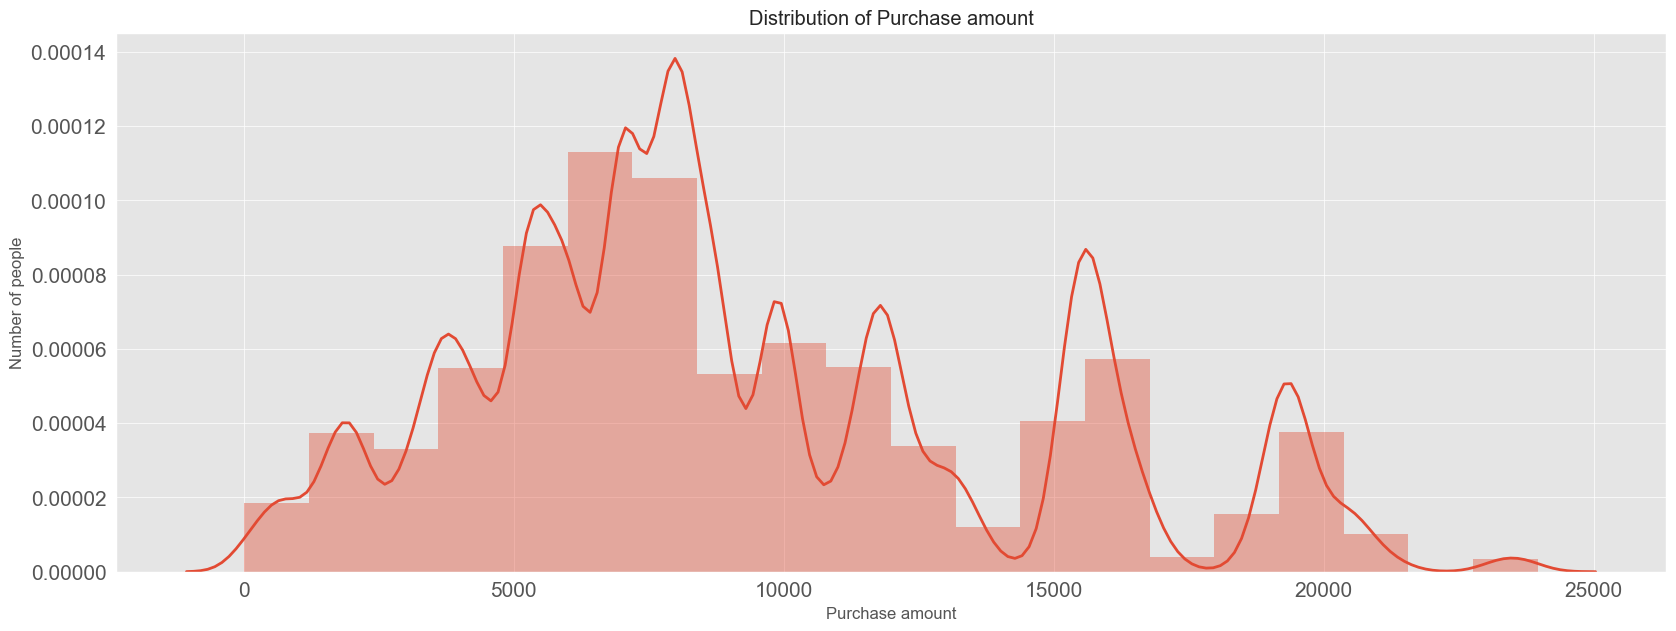

In [66]:
# Creating a distplot for dependent feature 'Purchase'
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount')
plt.xlabel('Purchase amount')
plt.ylabel('Number of people')
plt.tick_params(labelsize = 15)
plt.show()

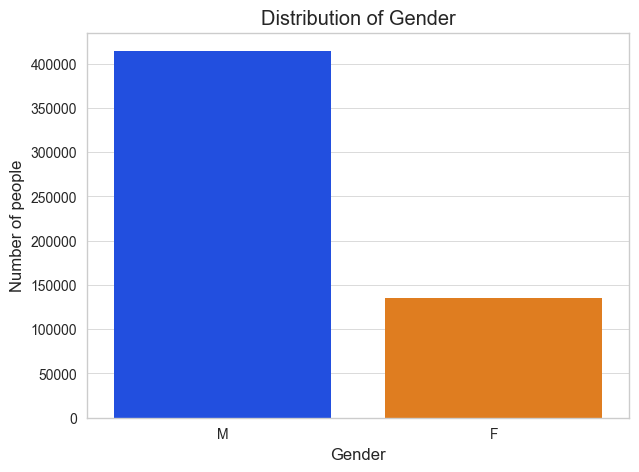

In [67]:
# Creating a barplot for 'Gender'
gen = train['Gender'].value_counts()
plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=gen.index, y=gen.values, palette = 'bright')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()

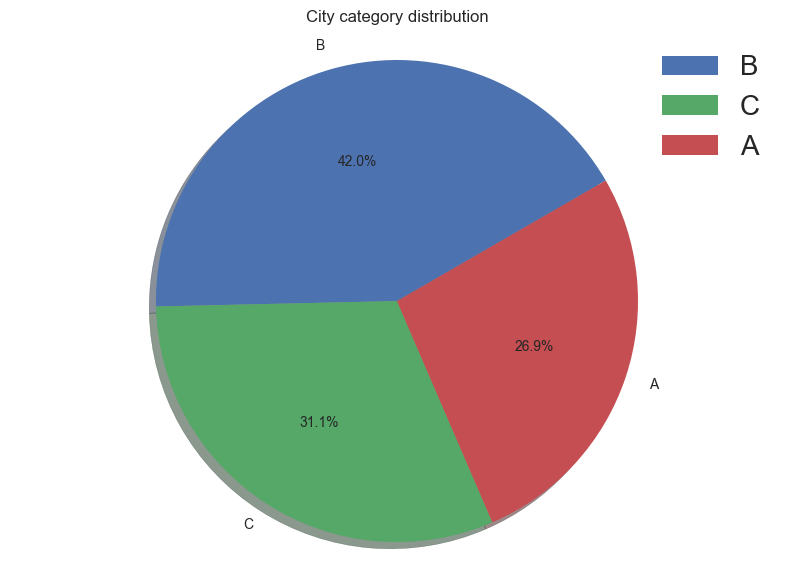

In [68]:
# Creating a pie chart for 'City Category'
city = train['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(city.values, labels = city.index, startangle = 30, shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution')
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

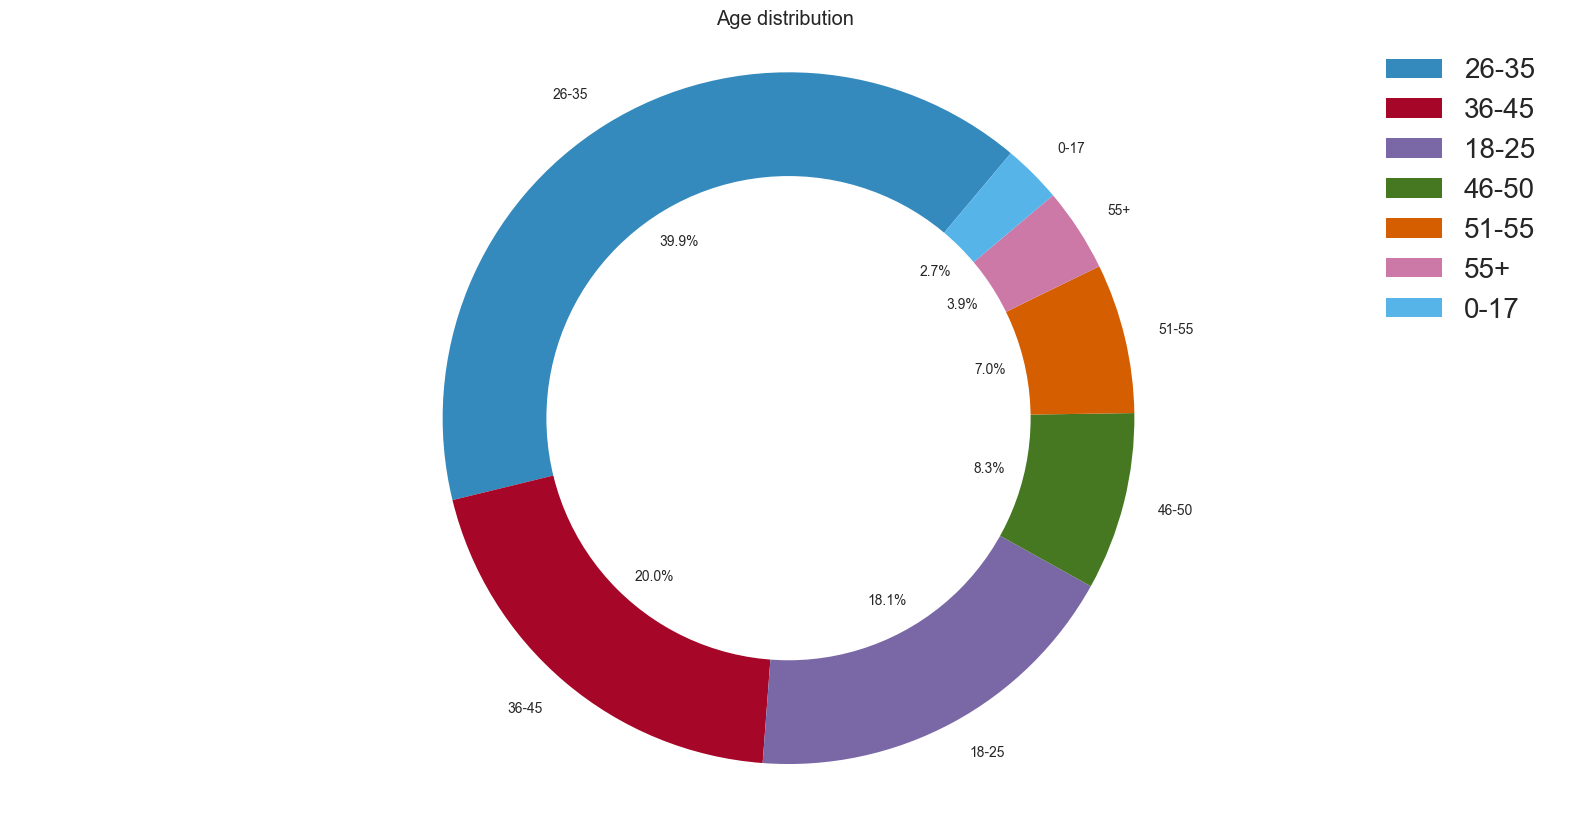

In [69]:
# Creating a donut chart for 'Age'
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution')
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

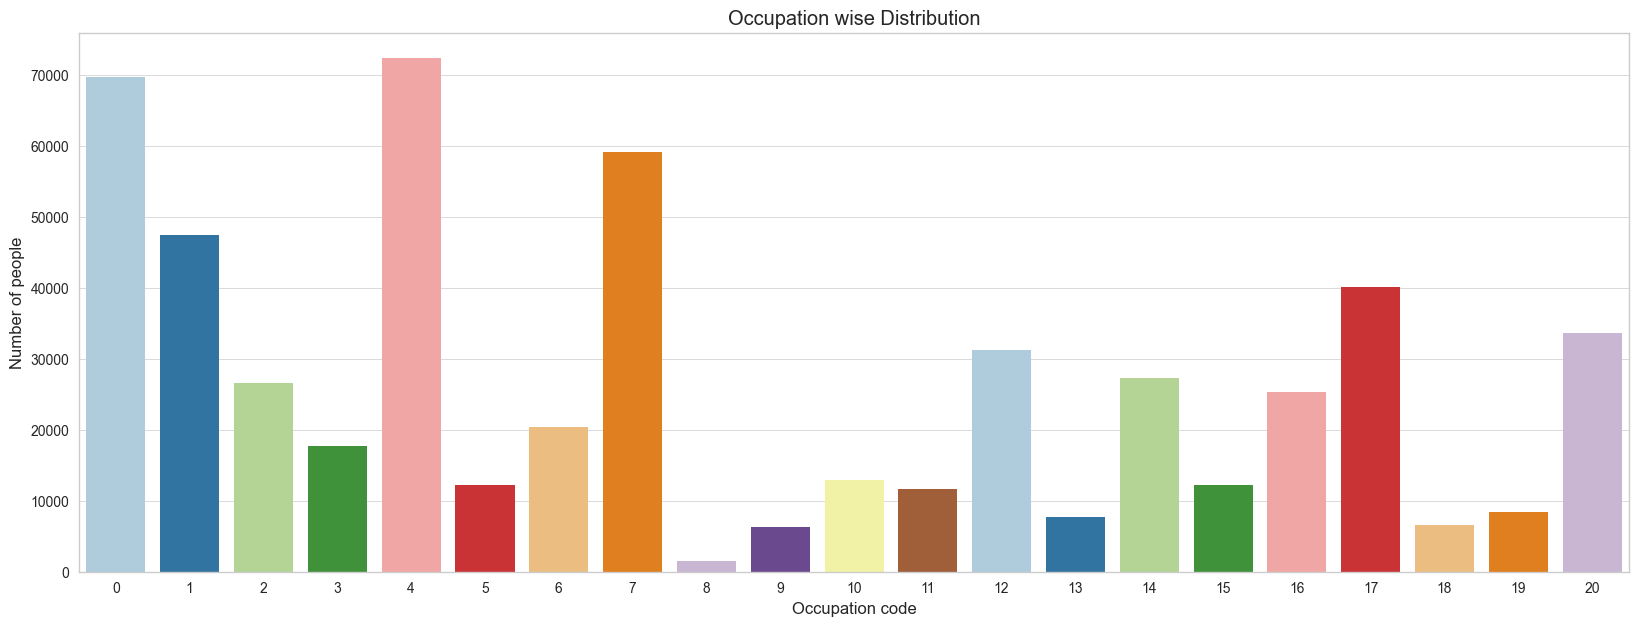

In [70]:
# Creating a barplot for 'Occupation'
occupation = train['Occupation'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=occupation.index, y=occupation.values, palette = 'Paired')
plt.title('Occupation wise Distribution')
plt.xlabel('Occupation code')
plt.ylabel('Number of people')
plt.show()

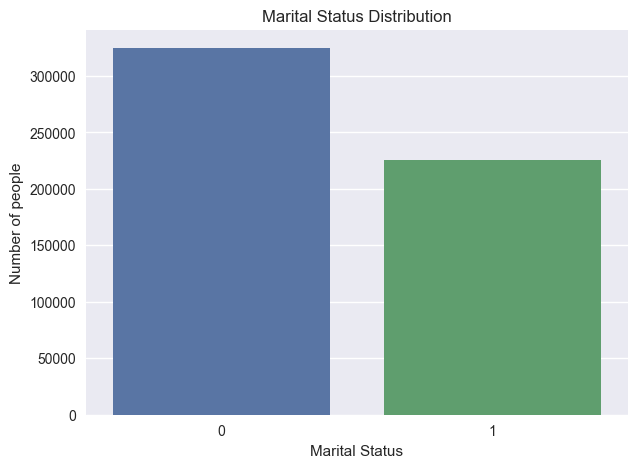

In [71]:
# Creating a countplot for 'Marital Status'
plt.style.use('seaborn')
plt.figure(figsize = (7, 5))
sns.countplot(x=train['Marital_Status'])
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.show()

### 2.2 Bivariate Analysis

In [72]:
# Creating a barplot of 'Occupation vs Purchase'
# plt.figure(figsize = (20, 7))
# plt.style.use('seaborn')
# sns.barplot(x=train['Occupation'], y=train['Purchase'], palette = 'Paired')
# plt.title('Purchase amount across Occupation')
# plt.xlabel('Occupation code')
# plt.ylabel('Purchase amount')
# plt.show()

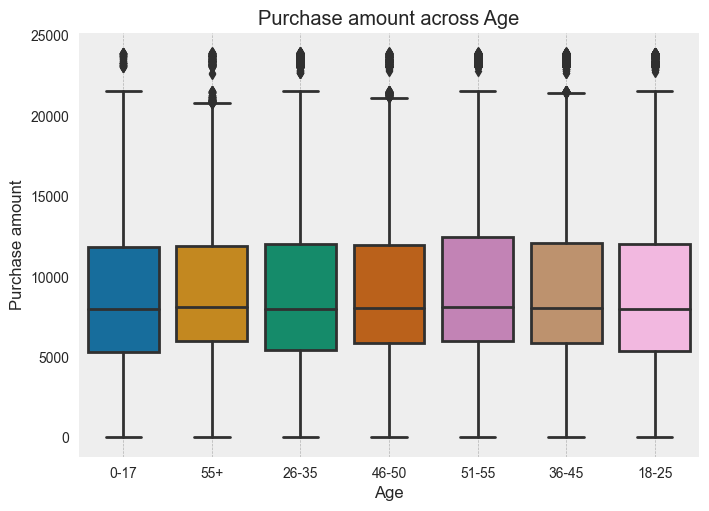

In [73]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(x=train['Age'], y=train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Age')
plt.xlabel('Age')
plt.ylabel('Purchase amount')
plt.grid()
plt.show()

In [74]:
# Creating a barplot of 'Gender vs Purchase'
# plt.style.use('default')
# sns.barplot(x=train['Gender'], y=train['Purchase'])
# plt.title('Purchase amount across Gender')
# plt.xlabel('Gender')
# plt.ylabel('Purchase amount')
# plt.show()

In [75]:
# Creating a barplot of 'City_Category vs Purchase'
# plt.style.use('bmh')
# sns.barplot(x=train['City_Category'], y=train['Purchase'])
# plt.title('Purchase amount across City Category')
# plt.xlabel('City Category')
# plt.ylabel('Purchase amount')
# plt.show()

In [76]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
# plt.style.use('default')
# plt.figure(figsize = (20, 7))
# sns.barplot(x=train['Product_Category_1'], y=train['Purchase'], palette = 'colorblind')
# plt.title('Purchase amount across Product Category')
# plt.xlabel('Product Category')
# plt.ylabel('Purchase amount')
# plt.grid()
# plt.show()

In [77]:
# Creating a barplot of 'Marital Status vs Purchase'
# plt.style.use('ggplot')
# sns.barplot(x=train['Marital_Status'], y=train['Purchase'])
# plt.title('Purchase amount across Marital Status')
# plt.xlabel('Marital Status')
# plt.ylabel('Purchase amount')
# plt.show()

### 2.3 Multivariate Analysis

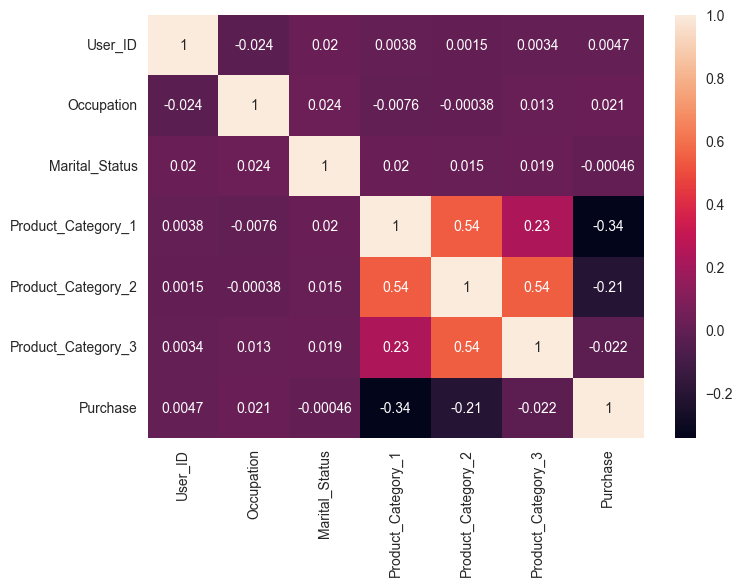

In [78]:
# Creating a heatmap of correlation matrix
sns.heatmap(train.corr(), annot = True)
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
An interesting observation can be made from the gender distribution plot that the number of females was less than the number of men who shopped during Black Friday.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.
</p></li>    

</ul>

</div>

## Step 3: Data preprocessing

### 3.2: Replacing '+' in 'Age' and 'Stay_In_Current_City_Years'

In [79]:
train['Age'] = train['Age'].replace('55+', '55')

In [80]:
test['Age'] = test['Age'].replace('55+', '55')

In [81]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace('4+', '4')

In [82]:
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].replace('4+', '4')

### 3.3: Dropping irrelevant features

In [83]:
train.drop('Product_Category_3', axis = 1, inplace = True)
test.drop('Product_Category_3', axis = 1, inplace = True)

In [84]:
df=pd.DataFrame()
df["User_ID"]=test.User_ID
df["Product_ID"]=test.Product_ID

In [85]:
train.drop('User_ID', axis = 1, inplace = True)
test.drop('User_ID', axis = 1, inplace = True)

In [86]:
train.drop('Product_ID', axis = 1, inplace = True)
test.drop('Product_ID', axis = 1, inplace = True)

In [87]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55,16,C,4,0,8,NaN,7969


In [88]:
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,M,46-50,7,B,2,1,1,11.0
1,M,26-35,17,C,0,0,3,5.0
2,F,36-45,1,B,4,1,5,14.0
3,F,36-45,1,B,4,1,4,9.0
4,F,26-35,1,C,1,0,4,5.0


### 3.4: Feature Encoding

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
label_encoder_gender = LabelEncoder()
train['Gender'] = label_encoder_gender.fit_transform(train['Gender'])
test['Gender'] = label_encoder_gender.fit_transform(test['Gender'])

In [91]:
label_encoder_age = LabelEncoder()
train['Age'] = label_encoder_age.fit_transform(train['Age'])
test['Age'] = label_encoder_age.fit_transform(test['Age'])

In [92]:
label_encoder_city = LabelEncoder()
train['City_Category'] = label_encoder_city.fit_transform(train['City_Category'])
test['City_Category'] = label_encoder_city.fit_transform(test['City_Category'])

### 3.5: Fixing null values in 'Product_Category_2' 

In [93]:
train['Product_Category_2'].fillna(train['Product_Category_2'].median(), inplace = True)
test['Product_Category_2'].fillna(test['Product_Category_2'].median(), inplace = True)

### 3.6: Convert 'Stay_In_Current_City_Years' into numeric data type

In [94]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype('int')
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].astype('int')

### 3.7: Separating dataset into train and test

### 3.8: Separating train into X and Y

In [95]:
X = train.drop("Purchase", axis = 1)
Xt = test

In [96]:
Y = train["Purchase"]


In [97]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,0,10,0,2,0,3,9.0
1,0,0,10,0,2,0,1,6.0
2,0,0,10,0,2,0,12,9.0
3,0,0,10,0,2,0,12,14.0
4,1,6,16,2,4,0,8,9.0


### 3.9: Feature Selection

In [98]:
# from sklearn.ensemble import ExtraTreesRegressor
# selector = ExtraTreesRegressor()

In [99]:
# selector.fit(X, Y)

In [100]:
# feature_imp = selector.feature_importances_

In [101]:
# feature_imp

In [102]:
# for index, val in enumerate(feature_imp):
#     print(index, round((val * 100), 2))

In [103]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)
Xt.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

In [104]:
X.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,0,10,2,3,9.0
1,0,10,2,1,6.0
2,0,10,2,12,9.0
3,0,10,2,12,14.0
4,6,16,4,8,9.0


### 3.10: Feature Scaling

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [106]:
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))
  Xt[col] = scaler.fit_transform(Xt[col].values.reshape(-1, 1))

In [107]:
X.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,0.0,0.5,0.5,0.105263,0.4375
1,0.0,0.5,0.5,0.000000,0.2500
2,0.0,0.5,0.5,0.578947,0.4375
3,0.0,0.5,0.5,0.578947,0.7500
4,1.0,0.8,1.0,0.368421,0.4375


In [108]:
Xt.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,0.666667,0.35,0.50,0.000000,0.5625
1,0.333333,0.85,0.00,0.117647,0.1875
2,0.500000,0.05,1.00,0.235294,0.7500
3,0.500000,0.05,1.00,0.176471,0.4375
4,0.333333,0.05,0.25,0.176471,0.1875


### 3.11: Creating a train test split

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [110]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (440054, 5)
X_test shape: (110014, 5)
Y_train shape: (440054,)
Y_test shape: (110014,)


## Step 4: Data Modelling

### 4.1: Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [112]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [113]:
Y_pred_lin_reg = lin_reg.predict(X_test)

### 4.2: KNN Regression

In [114]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [115]:
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [116]:
Y_pred_knn = knn.predict(X_test)

### 4.3: Decision Tree Regression

In [117]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
dec_tree = DecisionTreeRegressor()

In [118]:
dec_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [119]:
Y_pred_dec = dec_tree.predict(X_test)

### 4.4: Random Forest Regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()

In [121]:
ran_for.fit(X_train, Y_train)

RandomForestRegressor()

In [122]:
Y_pred_ran_for = ran_for.predict(X_test)

### 4.5: XGB Regressor

In [123]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)

In [124]:
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [125]:
Y_pred_xgb = xgb.predict(X_test)

### 4.6: Decision Tree Classifier

In [126]:
dec_tree_cls=DecisionTreeClassifier(criterion="entropy",max_depth=7)
dec_tree_cls.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [127]:
Y_pred_dtc=dec_tree_cls.predict(X_test)

## Step 5: Model Evaluation

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [164]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(Y_test, Y_pred_lin_reg))

Linear Regression: 
RMSE: 4699.473872577099
R2 score: 0.12103412745405762


In [130]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_knn)))
print("R2 score:", r2_score(Y_test, Y_pred_knn))

KNN regression: 
RMSE: 3315.8399554360817
R2 score: 0.5624167846378745


In [131]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
print("R2 score:", r2_score(Y_test, Y_pred_dec))

Decision tree regression: 
RMSE: 3064.472160611782
R2 score: 0.6262468212935595


In [132]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(Y_test, Y_pred_ran_for))

Random forest regression: 
RMSE: 3033.339096665533
R2 score: 0.6338024285614021


In [133]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb))

XGB regression: 
RMSE: 2981.4721877328107
R2 score: 0.6462185487125452


In [134]:
print("Decision tree classifier: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_dtc)))
print("R2 score:", r2_score(Y_test, Y_pred_dtc))

Decision tree classifier: 
RMSE: 3392.0895422981316
R2 score: 0.5420604529542212


## Step 6: Hyperparameter tuning

In [135]:
from sklearn.model_selection import RandomizedSearchCV

In [136]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [137]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [138]:
xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)

In [139]:
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)

In [140]:
xgb_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': ['0.01', '0.05', '0.1',
                                                          '0.25', '0.5', '0.75',
                                                          '1.0'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      20],
                                        'min_child_weight': [45, 46, 48, 50, 52,
                                                             53, 55, 57, 59, 61,
                                                             62, 64, 66, 68,
                                                             70]},
                   random_state=42)

In [141]:
xgb_cv.best_score_

0.6512784153045063

In [142]:
xgb_cv.best_params_

{'min_child_weight': 66,
 'max_depth': 11,
 'learning_rate': '1.0',
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [143]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, gamma = 0.3, learning_rate = 1.0, max_depth = 11, min_child_weight = 66, verbosity = 0, random_state = 42)

In [144]:
xgb_best.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=1.0, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=11, max_leaves=0, min_child_weight=66, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [145]:
Y_pred_xgb_best = xgb_best.predict(X_test)

In [146]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_best)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb_best))

XGB regression: 
RMSE: 2985.7339885411934
R2 score: 0.6452064153854109


<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we tried to build a model using various algorithms such as Linear regression, KNN regression, Decision tree regression, Random forest and XGB regressor to get the best possible prediction.
</p></li>     
        
<li><p style="font-family:verdana;">
The hyperparameter tuned XGB regressor gives us the best rmse value and r2 score for this problem.
</p></li>    

   

</ul>

</div>

In [147]:
xgb_best.score(X_test,Y_test)

0.6452064153854109

In [148]:
Yt = xgb_best.predict(Xt)

In [149]:
xgb_best.score(Xt,Yt)

1.0

In [150]:
submission = pd.DataFrame()
submission['Purchase'] = Yt
submission['User_ID'] = df['User_ID']
submission["Product_ID"]=df["Product_ID"]

In [151]:
submission.to_csv(r'C:\Users\thendralarasu\Downloads\submission.csv', index=False)

In [152]:
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [153]:
X_train.shape[1]

5

In [154]:
# NN_model = Sequential()

# # The Input Layer :
# NN_model.add(Dense(5,kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# # The Hidden Layers :
# NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))


# # The Output Layer :
# NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# # Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

In [155]:
# y_pred_n=NN_model.predict(X_test)
# metrics.mean_squared_error(Y_test,y_pred_n)

In [156]:
# plt.plot(history.history['mean_absolute_error'])
# plt.ticklabel_format(axis="y", style='plain')
# plt.show()

In [157]:
# y_pred_n

In [158]:
# from sklearn.metrics import mean_squared_error, r2_score
# print("XGB regression: ")
# print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred_n)))
# print("R2 score:", r2_score(Y_test, y_pred_n))

In [177]:
model=Sequential()
model.add(Dense(150 ,input_dim=X_train.shape[1],activation='gelu'))
model.add(Dense(100,input_dim=X_train.shape[1],activation='gelu'))
model.add(Dense(80,input_dim=X_train.shape[1],activation='gelu'))
model.add(Dense(80,input_dim=X_train.shape[1],activation='gelu'))
model.add(Dense(80,input_dim=X_train.shape[1],activation='gelu'))
model.add(Dense(1,input_dim=X_train.shape[1],activation='linear'))

In [178]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

In [179]:
model.fit(X_train,Y_train,epochs=50,batch_size=100)

Epoch 1/50
4401/4401 [==============================] - 9s 2ms/step - loss: 20966506.0000 - mse: 20966506.0000
Epoch 2/50
4401/4401 [==============================] - 9s 2ms/step - loss: 13679301.0000 - mse: 13679301.0000
Epoch 3/50
4401/4401 [==============================] - 9s 2ms/step - loss: 9854490.0000 - mse: 9854490.0000
Epoch 4/50
4401/4401 [==============================] - 8s 2ms/step - loss: 9516233.0000 - mse: 9516233.0000
Epoch 5/50
4401/4401 [==============================] - 8s 2ms/step - loss: 9444179.0000 - mse: 9444179.0000
Epoch 6/50
4401/4401 [==============================] - 23s 5ms/step - loss: 9396656.0000 - mse: 9396656.0000
Epoch 7/50
4401/4401 [==============================] - 23s 5ms/step - loss: 9376045.0000 - mse: 9376045.0000
Epoch 8/50
4401/4401 [==============================] - 23s 5ms/step - loss: 9354237.0000 - mse: 9354237.0000
Epoch 9/50
4401/4401 [==============================] - 23s 5ms/step - loss: 9332523.0000 - mse: 9332523.0000
Epoch 10/50

In [180]:
y_pred=model.predict(X_test)
y_pred

3438/3438 [==============================] - 4s 1ms/step


array([[14644.343 ],
       [13833.407 ],
       [ 7247.605 ],
       ...,
       [ 7371.3237],
       [ 4340.226 ],
       [ 9997.41  ]], dtype=float32)

In [181]:
print("ANN:")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred)))
print("R2 score:", r2_score(Y_test, y_pred))

ANN:
RMSE: 3025.9560369623277
R2 score: 0.6355828877409899
